In [22]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

In [23]:
# definition to display the grid
def display_arena(grid):
    # create a bigger plot
    plt.figure(figsize=(10, 10))

    # show the grid
    plt.imshow(grid, cmap='binary')

    # Add grids at every integer
    plt.grid(True)

    # Set the tick locations to integers
    plt.xticks(np.arange(0, grid.shape[1], 1))
    plt.yticks(np.arange(0, grid.shape[0], 1))

    # Change the y ticks to go from 0 to 30 bottom to top
    plt.gca().invert_yaxis()

    # remove the ticks from the x and y axis
    plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)

    # display the plot
    plt.show()

In [24]:
# We are going to create a multiagent reinforcement learning environment where the agents are rock paper scissors.
# if a rock meets a paper, the paper wins, and the rock becomes a paper
# if a paper meets a scissors, the scissors win, and the paper becomes a scissor
# if a scissors meets a rock, the rock wins, and the scissors becomes a rock
# each cell can be occupied by only one agent at a time, and the agents can move around the arena.
# the agents can move up, down, left, right, or stay in the same place, but they cannot move to a cell that is already occupied by another agent
# agents cannot move outside the arena

# we are going to define the actions space as [left, right, up, down, stay]
# we are going to define the state space as the position of the agent in the arena
# we are going to define the reward function based on the population as follows: reward = log ((population + 1) / total_population)

In [25]:
# state space is going to be all the possitions of the agents in the arena
# action space is going to be [left, right, up, down, stay]
# reward function at the end of the episode is going to be log ((population + 1) / total_population)

In [26]:
# initialize the policy as a random policy for rock, paper and scissors

In [27]:
# we're going to reduce the size of the arena to 5x5 for simplicity
# Let's define our Q(s, a) function as a dictionary of dictionaries
# Q = {state: {action: value}}

# let's define the state space
# RPS
rock_state_space_1_1_1 = [[111, i, j, k, l, m, n] for i in range(5) for j in range(5) for k in range(5) for l in range(5) for m in range(5) for n in range(5)]  # if there are 3 rocks

# RPP
rock_state_space_1_2_0 = [[120, i, j, k, l, m, n] for i in range(5) for j in range(5) for k in range(5) for l in range(5) for m in range(5) for n in range(5)]  # if there are 3 rocks

# RSS
rock_state_space_1_0_2 = [[102, i, j, k, l, m, n] for i in range(5) for j in range(5) for k in range(5) for l in range(5) for m in range(5) for n in range(5)]  # if there are 3 rocks

# RRP
rock_state_space_2_1_0 = [[210, i, j, k, l, m, n] for i in range(5) for j in range(5) for k in range(5) for l in range(5) for m in range(5) for n in range(5)]  # if there are 3 rocks

# RRS
rock_state_space_2_0_1 = [[201, i, j, k, l, m, n] for i in range(5) for j in range(5) for k in range(5) for l in range(5) for m in range(5) for n in range(5)]  # if there are 3 rocks

# RRR
rock_state_space_3_0_0 = [[300, i, j, k, l, m, n] for i in range(5) for j in range(5) for k in range(5) for l in range(5) for m in range(5) for n in range(5)]  # if there are 3 rocks

rock_state_space_1 = rock_state_space_1_1_1 + rock_state_space_1_2_0 + rock_state_space_1_0_2
rock_state_space_2 = rock_state_space_2_1_0 + rock_state_space_2_0_1
rock_state_space_3 = rock_state_space_3_0_0

# let's define the action space
action_space_1 = ['left', 'right', 'up', 'down', 'stay']

# action space for 2 rocks
action_space_2 = ['{}_{}'.format(a1, a2) for a1 in action_space_1 for a2 in action_space_1]

action_space_3 = ['{}_{}_{}'.format(a1, a2, a3) for a1 in action_space_1 for a2 in action_space_1 for a3 in action_space_1]

# let's define the Q function
Q = {}
for state in rock_state_space_1:
    Q[tuple(state)] = {}
    for action in action_space_1:
        Q[tuple(state)][action] = np.random.random()
    
for state in rock_state_space_2:
    Q[tuple(state)] = {}
    for action in action_space_2:
        Q[tuple(state)][action] = np.random.random()

for state in rock_state_space_3:
    Q[tuple(state)] = {}
    for action in action_space_3:
        Q[tuple(state)][action] = np.random.random()

In [28]:
# let's make the game

diff_list = []

delta = 0.9

for _ in range(5000):

    print("iteration", _+1)
    
    # define the arena
    arena = np.zeros((5, 5))

    # define the agents
    # arena[0:1, 0:1] = 1 # rock
    # arena[2:3, 2:3] = 2 # paper
    # arena[4:5, 4:5] = 3 # scissors

    arena[0, 0] = 1 # rock
    arena[4, 4] = 1 # paper
    arena[2, 2] = 2 # paper
    
    # print("Initial Arena:")
    # display_arena(arena)

    # positions of the agents
    rock_state = [0, 0, 4, 4]
    paper_state = []
    scissors_state = [2, 2]

    # let's define the action space
    actions = ['left', 'right', 'up', 'down', 'stay']

    # rules to move
    # length of episode
    ep_length = 10000
    
    diff = 0
    
    caputures = [0,0,0]
    
    for i in range(ep_length):
        new_arena = np.zeros((5, 5)) # new arena
        
        # check if there are 2 or 3 rocks, and simulate accordingly
        if len(rock_state) == 2:
            if len(paper_state) == 0:
                t_lis = 102
            if len(paper_state) == 2:
                t_lis = 111
            elif len(paper_state) == 4:
                t_lis = 120
            action = Q[tuple([t_lis] + rock_state + paper_state + scissors_state)]
            if np.random.rand() < delta:
                action = max(action, key=action.get)
            else:
                action = np.random.choice(action_space_1)
            
            # move the rock
            if action == 'left' and rock_state[1] > 0:
                rock_state[1] -= 1
            elif action == 'right' and rock_state[1] < 4:
                rock_state[1] += 1
            elif action == 'up' and rock_state[0] > 0:
                rock_state[0] -= 1
            elif action == 'down' and rock_state[0] < 4:
                rock_state[0] += 1
            
            reward = np.log((len(rock_state) + len(scissors_state) // 2 - len(paper_state) + 4))
            
            # update the Q function
            
            t = reward + 0.9 * max(Q[tuple([t_lis] + rock_state + paper_state + scissors_state)].values())
            diff += np.abs(t - Q[tuple([t_lis] + rock_state + paper_state + scissors_state)][action])
            
            Q[tuple([t_lis] + rock_state + paper_state + scissors_state)][action] = reward + 0.9 * max(Q[tuple([t_lis] + rock_state + paper_state + scissors_state)].values())

        elif len(rock_state) == 4:
            if len(paper_state) == 2:
                t_lis = 210
            elif len(paper_state) == 0:
                t_lis = 201
            action = Q[tuple([t_lis] + rock_state + paper_state + scissors_state)]
            if np.random.rand() < delta:
                action = max(action, key=action.get)
            else:
                action = np.random.choice(action_space_2)
            
            # move the rocks
            actions = action.split('_')
            for idx, act in enumerate(actions):
                if act == 'left' and rock_state[idx*2+1] > 0:
                    rock_state[idx*2+1] -= 1
                elif act == 'right' and rock_state[idx*2+1] < 4:
                    rock_state[idx*2+1] += 1
                elif act == 'up' and rock_state[idx*2] > 0:
                    rock_state[idx*2] -= 1
                elif act == 'down' and rock_state[idx*2] < 4:
                    rock_state[idx*2] += 1
            
            reward = np.log((len(rock_state) + len(scissors_state) // 2 - len(paper_state) + 4))
            
            # update the Q function
            
            t = reward + 0.9 * max(Q[tuple([t_lis] + rock_state + paper_state + scissors_state)].values())
            diff += np.abs(t - Q[tuple([t_lis] + rock_state + paper_state + scissors_state)][action])
            
            Q[tuple([t_lis] + rock_state + paper_state + scissors_state)][action] = reward + 0.9 * max(Q[tuple([t_lis] + rock_state + paper_state + scissors_state)].values())

        elif len(rock_state) == 6:
            action = Q[tuple([300] + rock_state + paper_state + scissors_state)]
            if np.random.rand() < delta:
                action = max(action, key=action.get)
            else:
                action = np.random.choice(action_space_3)
            
            # move the rocks
            actions = action.split('_')
            for idx, act in enumerate(actions):
                if act == 'left' and rock_state[idx*2+1] > 0:
                    rock_state[idx*2+1] -= 1
                elif act == 'right' and rock_state[idx*2+1] < 4:
                    rock_state[idx*2+1] += 1
                elif act == 'up' and rock_state[idx*2] > 0:
                    rock_state[idx*2] -= 1
                elif act == 'down' and rock_state[idx*2] < 4:
                    rock_state[idx*2] += 1
            
            # reward = np.log((len(rock_state) // 2 + 1) / 3)
            reward = np.log((len(rock_state) + len(scissors_state) // 2 - len(paper_state) + 4))
            
            # update the Q function
            
            t = reward + 0.9 * max(Q[tuple([300] + rock_state + paper_state + scissors_state)].values())
            diff += np.abs(t - Q[tuple([300] + rock_state + paper_state + scissors_state)][action])
            
            Q[tuple([300] + rock_state + paper_state + scissors_state)][action] = reward + 0.9 * max(Q[tuple([300] + rock_state + paper_state + scissors_state)].values())
        
        # follow a random strategy for paper and scissors
        
        # if paper exists
        if len(paper_state) == 2:    
            paper_action = np.random.choice(actions) 
            if paper_action == 'left' and paper_state[1] > 0:
                paper_state[1] -= 1
            elif paper_action == 'right' and paper_state[1] < 4:
                paper_state[1] += 1
            elif paper_action == 'up' and paper_state[0] > 0:
                paper_state[0] -= 1
            elif paper_action == 'down' and paper_state[0] < 4:
                paper_state[0] += 1
            # if np.random.rand() < 0.9:
            #     paper_action = max(paper_action, key=paper_action.get)
            # else:
            paper_action = np.random.choice(actions)
            
            # move the paper
            if paper_action == 'left' and paper_state[1] > 0:
                paper_state[1] -= 1
            elif paper_action == 'right' and paper_state[1] < 4:
                paper_state[1] += 1
            elif paper_action == 'up' and paper_state[0] > 0:
                paper_state[0] -= 1
            elif paper_action == 'down' and paper_state[0] < 4:
                paper_state[0] += 1

        elif len(paper_state) == 4:
            # paper_action = Q[tuple(paper_state)]
            # if np.random.rand() < 0.9:
            #     paper_action = max(paper_action, key=paper_action.get)
            # else:
            paper_action = np.random.choice(action_space_2)
            
            # move the papers
            actions = paper_action.split('_')
            for idx, act in enumerate(actions):
                if act == 'left' and paper_state[idx*2+1] > 0:
                    paper_state[idx*2+1] -= 1
                elif act == 'right' and paper_state[idx*2+1] < 4:
                    paper_state[idx*2+1] += 1
                elif act == 'up' and paper_state[idx*2] > 0:
                    paper_state[idx*2] -= 1
                elif act == 'down' and paper_state[idx*2] < 4:
                    paper_state[idx*2] += 1
            
        elif len(paper_state) == 6:
            # paper_action = Q[tuple(paper_state)]
            # if np.random.rand() < 0.9:
            #     paper_action = max(paper_action, key=paper_action.get)
            # else:
            paper_action = np.random.choice(action_space_3)
            
            # move the papers
            actions = paper_action.split('_')
            for idx, act in enumerate(actions):
                if act == 'left' and paper_state[idx*2+1] > 0:
                    paper_state[idx*2+1] -= 1
                elif act == 'right' and paper_state[idx*2+1] < 4:
                    paper_state[idx*2+1] += 1
                elif act == 'up' and paper_state[idx*2] > 0:
                    paper_state[idx*2] -= 1
                elif act == 'down' and paper_state[idx*2] < 4:
                    paper_state[idx*2] += 1

        # if scissors exist
        if len(scissors_state) == 2:
            # scissors_action = Q[tuple(scissors_state)]
            # if np.random.rand() < 0.9:
            #     scissors_action = max(scissors_action, key=scissors_action.get)
            # else:
            scissors_action = np.random.choice(actions)
            
            # move the scissors
            if scissors_action == 'left' and scissors_state[1] > 0:
                scissors_state[1] -= 1
            elif scissors_action == 'right' and scissors_state[1] < 4:
                scissors_state[1] += 1
            elif scissors_action == 'up' and scissors_state[0] > 0:
                scissors_state[0] -= 1
            elif scissors_action == 'down' and scissors_state[0] < 4:
                scissors_state[0] += 1

        elif len(scissors_state) == 4:
            # scissors_action = Q[tuple(scissors_state)]
            # if np.random.rand() < 0.9:
            #     scissors_action = max(scissors_action, key=scissors_action.get)
            # else:
            scissors_action = np.random.choice(action_space_2)
            
            # move the scissors
            actions = scissors_action.split('_')
            for idx, act in enumerate(actions):
                if act == 'left' and scissors_state[idx*2+1] > 0:
                    scissors_state[idx*2+1] -= 1
                elif act == 'right' and scissors_state[idx*2+1] < 4:
                    scissors_state[idx*2+1] += 1
                elif act == 'up' and scissors_state[idx*2] > 0:
                    scissors_state[idx*2] -= 1
                elif act == 'down' and scissors_state[idx*2] < 4:
                    scissors_state[idx*2] += 1

        elif len(scissors_state) == 6:
            # scissors_action = Q[tuple(scissors_state)]
            # if np.random.rand() < 0.9:
            #     scissors_action = max(scissors_action, key=scissors_action.get)
            # else:
            scissors_action = np.random.choice(action_space_3)
            
            # move the scissors
            actions = scissors_action.split('_')
            for idx, act in enumerate(actions):
                if act == 'left' and scissors_state[idx*2+1] > 0:
                    scissors_state[idx*2+1] -= 1
                elif act == 'right' and scissors_state[idx*2+1] < 4:
                    scissors_state[idx*2+1] += 1
                elif act == 'up' and scissors_state[idx*2] > 0:
                    scissors_state[idx*2] -= 1
                elif act == 'down' and scissors_state[idx*2] < 4:
                    scissors_state[idx*2] += 1
        
        # check if the agents are in the same cell
        # if the are in the same cell, the rock becomes a paper
        capture = False
        # if rock_state == paper_state:
        #     paper_state.extend(rock_state)
        #     rock_state = []
        #     capture = True
        # elif rock_state == scissors_state:
        #     scissors_state.extend(rock_state)
        #     rock_state = []
        #     capture = True
        # elif paper_state == scissors_state:
        #     scissors_state.extend(paper_state)
        #     paper_state = []
        #     capture = True
        
        rock_pos = []
        for i in range(0, len(rock_state), 2):
            rock_pos.append(rock_state[i:i+2])
        
        paper_pos = []
        for i in range(0, len(paper_state), 2):
            paper_pos.append(paper_state[i:i+2])
        
        scissor_pos = []
        for i in range(0, len(scissors_state), 2):
            scissor_pos.append(scissors_state[i:i+2])
        
        # check the condition for capture
        for rock in rock_pos:
            for paper in paper_pos:
                if rock == paper:
                    paper_pos.extend([rock])
                    rock_pos.remove(rock)
                    capture = True
                    caputures[0] += 1
                    print("P > R")
                    break
            for scissor in scissor_pos:
                if rock == scissor:
                    rock_pos.extend([rock])
                    scissor_pos.remove(scissor)
                    capture = True
                    caputures[1] += 1
                    print("R > S")
                    break
        for paper in paper_pos:
            for scissor in scissor_pos:
                if paper == scissor:
                    scissor_pos.extend([paper])
                    paper_pos.remove(paper)
                    capture = True
                    caputures[2] += 1
                    print("S > P")
                    break

        
        # join the position to get back the rock_state, paper_state and scissor_state
        
        rock_state = []
        # print(rock_pos, paper_pos, scissor_pos)
        for rock in rock_pos:
            rock_state += rock
        paper_state = []
        for paper in paper_pos:
            paper_state += paper
        scissors_state = []
        for scissor in scissor_pos:
            scissors_state += scissor
        
        # update the new arena
        if len(rock_state) == 2:
            new_arena[rock_state[0], rock_state[1]] = 1
        elif len(rock_state) == 4:
            new_arena[rock_state[0], rock_state[1]] = 1
            new_arena[rock_state[2], rock_state[3]] = 1
        elif len(rock_state) == 6:
            new_arena[rock_state[0], rock_state[1]] = 1
            new_arena[rock_state[2], rock_state[3]] = 1
            new_arena[rock_state[4], rock_state[5]] = 1

        # do the same for paper
        if len(paper_state) == 2:
            new_arena[paper_state[0], paper_state[1]] = 2
        elif len(paper_state) == 4:
            new_arena[paper_state[0], paper_state[1]] = 2
            new_arena[paper_state[2], paper_state[3]] = 2
        elif len(paper_state) == 6:
            new_arena[paper_state[0], paper_state[1]] = 2
            new_arena[paper_state[2], paper_state[3]] = 2
            new_arena[paper_state[4], paper_state[5]] = 2

        # do the same for scissors
        if len(scissors_state) == 2:
            new_arena[scissors_state[0], scissors_state[1]] = 3
        elif len(scissors_state) == 4:
            new_arena[scissors_state[0], scissors_state[1]] = 3
            new_arena[scissors_state[2], scissors_state[3]] = 3
        elif len(scissors_state) == 6:
            new_arena[scissors_state[0], scissors_state[1]] = 3
            new_arena[scissors_state[2], scissors_state[3]] = 3
            new_arena[scissors_state[4], scissors_state[5]] = 3

        # display the new arena
        # if capture:
        #     print("Capture!")
        #     # print the individual populations
        #     print("Rock Population: ", len(rock_state) // 2)
        #     print("Paper Population: ", len(paper_state) // 2)
        #     print("Scissors Population: ", len(scissors_state) // 2)
        #     display_arena(arena)
        #     display_arena(new_arena)
        
    print(f"At iteration {_+1}, difference is {diff}")
    diff_list.append(diff)
    print("Captures: ", caputures)
    print("Rock Population: ", len(rock_state) // 2)
    print("Paper Population: ", len(paper_state) // 2)
    print("Scissors Population: ", len(scissors_state) // 2)
        
        

iteration 1
R > S
At iteration 1, difference is 20644.38976457933
Captures:  [0, 1, 0]
Rock Population:  3
Paper Population:  0
Scissors Population:  0
iteration 2
R > S
At iteration 2, difference is 23271.613820368944
Captures:  [0, 1, 0]
Rock Population:  3
Paper Population:  0
Scissors Population:  0
iteration 3
R > S
At iteration 3, difference is 23318.0949776285
Captures:  [0, 1, 0]
Rock Population:  3
Paper Population:  0
Scissors Population:  0
iteration 4
R > S
At iteration 4, difference is 26061.56824684986
Captures:  [0, 1, 0]
Rock Population:  3
Paper Population:  0
Scissors Population:  0
iteration 5
R > S
At iteration 5, difference is 25518.91254737314
Captures:  [0, 1, 0]
Rock Population:  3
Paper Population:  0
Scissors Population:  0
iteration 6
R > S
At iteration 6, difference is 26984.09237687244
Captures:  [0, 1, 0]
Rock Population:  3
Paper Population:  0
Scissors Population:  0
iteration 7
R > S
At iteration 7, difference is 23729.885122719337
Captures:  [0, 1, 0]


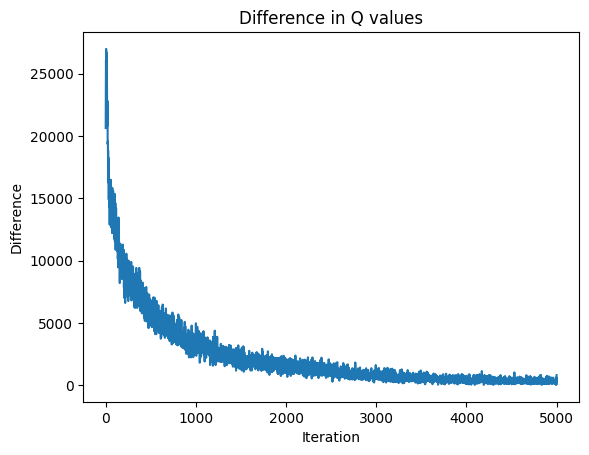

In [29]:
# plot diff list
plt.plot(diff_list)
plt.xlabel("Iteration")
plt.ylabel("Difference")
plt.title("Difference in Q values")
plt.show()

In [30]:
# write the Q function to a file
with open("Q_values.txt", "w") as f:
    # write each element line by line
    for key, value in Q.items():
        f.write(f"{key}: {value}\n")
    

In [31]:
rock_pop = 0
paper_pop = 0
scissor_pop = 0

for _ in range(100):    
# define the arena
    arena = np.zeros((5, 5))

    # # define the agents
    # arena[0:1, 0:1] = 1 # rock
    # arena[2:3, 2:3] = 2 # paper
    # arena[4:5, 4:5] = 2 # scissors

    arena[0, 0] = 1 # rock
    arena[4, 4] = 1 # paper
    arena[2, 2] = 2 # paper
    
    # print("Initial Arena:")
    # display_arena(arena)

    # positions of the agents
    rock_state = [0, 0, 4, 4]
    paper_state = []
    scissors_state = [2, 2]

    # let's define the action space
    actions = ['left', 'right', 'up', 'down', 'stay']

    # rules to move
    # length of episode
    ep_length = 10000
    
    captures = [0,0,0]
    
    print("iteration", _+1)
        
    for i in range(ep_length):
        new_arena = np.zeros((5, 5)) # new arena
        # check if there are 2 or 3 rocks, and simulate accordingly
        if len(rock_state) == 2:
            if len(paper_state) == 0:
                t_lis = 102
            if len(paper_state) == 2:
                t_lis = 111
            elif len(paper_state) == 4:
                t_lis = 120
            action = Q[tuple([t_lis] + rock_state + paper_state + scissors_state)]
            if np.random.rand() < 0.9999999:
                action = max(action, key=action.get)
            else:
                action = np.random.choice(action_space_1)
            
            # move the rock
            if action == 'left' and rock_state[1] > 0:
                rock_state[1] -= 1
            elif action == 'right' and rock_state[1] < 4:
                rock_state[1] += 1
            elif action == 'up' and rock_state[0] > 0:
                rock_state[0] -= 1
            elif action == 'down' and rock_state[0] < 4:
                rock_state[0] += 1
            
            reward = np.log((len(rock_state) // 2 + 1) / 3)
            
            # update the Q function
            
            t = reward + 0.9 * max(Q[tuple([t_lis] + rock_state + paper_state + scissors_state)].values())
            diff += np.abs(t - Q[tuple([t_lis] + rock_state + paper_state + scissors_state)][action])
            
            # Q[tuple([t_lis] + rock_state + paper_state + scissors_state)][action] = reward + 0.9 * max(Q[tuple([t_lis] + rock_state + paper_state + scissors_state)].values())

        elif len(rock_state) == 4:
            if len(paper_state) == 2:
                t_lis = 210
            elif len(paper_state) == 0:
                t_lis = 201
            action = Q[tuple([t_lis] + rock_state + paper_state + scissors_state)]
            if np.random.rand() < 0.999999:
                action = max(action, key=action.get)
            else:
                action = np.random.choice(action_space_2)
            
            # move the rocks
            actions = action.split('_')
            for idx, act in enumerate(actions):
                if act == 'left' and rock_state[idx*2+1] > 0:
                    rock_state[idx*2+1] -= 1
                elif act == 'right' and rock_state[idx*2+1] < 4:
                    rock_state[idx*2+1] += 1
                elif act == 'up' and rock_state[idx*2] > 0:
                    rock_state[idx*2] -= 1
                elif act == 'down' and rock_state[idx*2] < 4:
                    rock_state[idx*2] += 1
            
            reward = np.log((len(rock_state) // 2 + 1) / 3)
            
            # update the Q function
            
            t = reward + 0.9 * max(Q[tuple([t_lis] + rock_state + paper_state + scissors_state)].values())
            diff += np.abs(t - Q[tuple([t_lis] + rock_state + paper_state + scissors_state)][action])
            
            # Q[tuple([t_lis] + rock_state + paper_state + scissors_state)][action] = reward + 0.9 * max(Q[tuple([t_lis] + rock_state + paper_state + scissors_state)].values())

        elif len(rock_state) == 6:
            action = Q[tuple([300] + rock_state + paper_state + scissors_state)]
            if np.random.rand() < 0.9999999:
                action = max(action, key=action.get)
            else:
                action = np.random.choice(action_space_3)
            
            # move the rocks
            actions = action.split('_')
            for idx, act in enumerate(actions):
                if act == 'left' and rock_state[idx*2+1] > 0:
                    rock_state[idx*2+1] -= 1
                elif act == 'right' and rock_state[idx*2+1] < 4:
                    rock_state[idx*2+1] += 1
                elif act == 'up' and rock_state[idx*2] > 0:
                    rock_state[idx*2] -= 1
                elif act == 'down' and rock_state[idx*2] < 4:
                    rock_state[idx*2] += 1
            
            reward = np.log((len(rock_state) // 2 + 1) / 3)
            
            # update the Q function
            
            t = reward + 0.9 * max(Q[tuple([300] + rock_state + paper_state + scissors_state)].values())
            diff += np.abs(t - Q[tuple([300] + rock_state + paper_state + scissors_state)][action])
            
            # Q[tuple([300] + rock_state + paper_state + scissors_state)][action] = reward + 0.9 * max(Q[tuple([300] + rock_state + paper_state + scissors_state)].values())
        
        # follow a random strategy for paper and scissors
        
        # if paper exists
        if len(paper_state) == 2:    
            paper_action = np.random.choice(actions) 
            if paper_action == 'left' and paper_state[1] > 0:
                paper_state[1] -= 1
            elif paper_action == 'right' and paper_state[1] < 4:
                paper_state[1] += 1
            elif paper_action == 'up' and paper_state[0] > 0:
                paper_state[0] -= 1
            elif paper_action == 'down' and paper_state[0] < 4:
                paper_state[0] += 1
            # if np.random.rand() < 0.9:
            #     paper_action = max(paper_action, key=paper_action.get)
            # else:
            paper_action = np.random.choice(actions)
            
            # move the paper
            if paper_action == 'left' and paper_state[1] > 0:
                paper_state[1] -= 1
            elif paper_action == 'right' and paper_state[1] < 4:
                paper_state[1] += 1
            elif paper_action == 'up' and paper_state[0] > 0:
                paper_state[0] -= 1
            elif paper_action == 'down' and paper_state[0] < 4:
                paper_state[0] += 1

        elif len(paper_state) == 4:
            # paper_action = Q[tuple(paper_state)]
            # if np.random.rand() < 0.9:
            #     paper_action = max(paper_action, key=paper_action.get)
            # else:
            paper_action = np.random.choice(action_space_2)
            
            # move the papers
            actions = paper_action.split('_')
            for idx, act in enumerate(actions):
                if act == 'left' and paper_state[idx*2+1] > 0:
                    paper_state[idx*2+1] -= 1
                elif act == 'right' and paper_state[idx*2+1] < 4:
                    paper_state[idx*2+1] += 1
                elif act == 'up' and paper_state[idx*2] > 0:
                    paper_state[idx*2] -= 1
                elif act == 'down' and paper_state[idx*2] < 4:
                    paper_state[idx*2] += 1
            
        elif len(paper_state) == 6:
            # paper_action = Q[tuple(paper_state)]
            # if np.random.rand() < 0.9:
            #     paper_action = max(paper_action, key=paper_action.get)
            # else:
            paper_action = np.random.choice(action_space_3)
            
            # move the papers
            actions = paper_action.split('_')
            for idx, act in enumerate(actions):
                if act == 'left' and paper_state[idx*2+1] > 0:
                    paper_state[idx*2+1] -= 1
                elif act == 'right' and paper_state[idx*2+1] < 4:
                    paper_state[idx*2+1] += 1
                elif act == 'up' and paper_state[idx*2] > 0:
                    paper_state[idx*2] -= 1
                elif act == 'down' and paper_state[idx*2] < 4:
                    paper_state[idx*2] += 1

        # if scissors exist
        if len(scissors_state) == 2:
            # scissors_action = Q[tuple(scissors_state)]
            # if np.random.rand() < 0.9:
            #     scissors_action = max(scissors_action, key=scissors_action.get)
            # else:
            scissors_action = np.random.choice(actions)
            
            # move the scissors
            if scissors_action == 'left' and scissors_state[1] > 0:
                scissors_state[1] -= 1
            elif scissors_action == 'right' and scissors_state[1] < 4:
                scissors_state[1] += 1
            elif scissors_action == 'up' and scissors_state[0] > 0:
                scissors_state[0] -= 1
            elif scissors_action == 'down' and scissors_state[0] < 4:
                scissors_state[0] += 1

        elif len(scissors_state) == 4:
            # scissors_action = Q[tuple(scissors_state)]
            # if np.random.rand() < 0.9:
            #     scissors_action = max(scissors_action, key=scissors_action.get)
            # else:
            scissors_action = np.random.choice(action_space_2)
            
            # move the scissors
            actions = scissors_action.split('_')
            for idx, act in enumerate(actions):
                if act == 'left' and scissors_state[idx*2+1] > 0:
                    scissors_state[idx*2+1] -= 1
                elif act == 'right' and scissors_state[idx*2+1] < 4:
                    scissors_state[idx*2+1] += 1
                elif act == 'up' and scissors_state[idx*2] > 0:
                    scissors_state[idx*2] -= 1
                elif act == 'down' and scissors_state[idx*2] < 4:
                    scissors_state[idx*2] += 1

        elif len(scissors_state) == 6:
            # scissors_action = Q[tuple(scissors_state)]
            # if np.random.rand() < 0.9:
            #     scissors_action = max(scissors_action, key=scissors_action.get)
            # else:
            scissors_action = np.random.choice(action_space_3)
            
            # move the scissors
            actions = scissors_action.split('_')
            for idx, act in enumerate(actions):
                if act == 'left' and scissors_state[idx*2+1] > 0:
                    scissors_state[idx*2+1] -= 1
                elif act == 'right' and scissors_state[idx*2+1] < 4:
                    scissors_state[idx*2+1] += 1
                elif act == 'up' and scissors_state[idx*2] > 0:
                    scissors_state[idx*2] -= 1
                elif act == 'down' and scissors_state[idx*2] < 4:
                    scissors_state[idx*2] += 1
        
        # check if the agents are in the same cell
        # if they are in the same cell, the rock becomes a paper
        capture = False
        # if rock_state == paper_state:
        #     paper_state.extend(rock_state)
        #     rock_state = []
        #     capture = True
        # elif rock_state == scissors_state:
        #     scissors_state.extend(rock_state)
        #     rock_state = []
        #     capture = True
        # elif paper_state == scissors_state:
        #     scissors_state.extend(paper_state)
        #     paper_state = []
        #     capture = True
        
        # get positions of rocks from rock_state
        rock_pos = []
        for i in range(0, len(rock_state), 2):
            rock_pos.append(rock_state[i:i+2])
        
        paper_pos = []
        for i in range(0, len(paper_state), 2):
            paper_pos.append(paper_state[i:i+2])
        
        scissor_pos = []
        for i in range(0, len(scissors_state), 2):
            scissor_pos.append(scissors_state[i:i+2])
        
        # check the condition for capture
        for rock in rock_pos:
            for paper in paper_pos:
                if rock == paper:
                    paper_pos.extend([rock])
                    rock_pos.remove(paper)
                    capture = True
                    captures[0] += 1
                    print("P > R")
                    break
            for scissor in scissor_pos:
                if rock == scissor:
                    rock_pos.extend([rock])
                    scissor_pos.remove(rock)
                    capture = True
                    captures[1] += 1
                    print("R > S")
                    break
        for paper in paper_pos:
            for scissor in scissor_pos:
                if paper == scissor:
                    scissor_pos.extend([paper])
                    paper_pos.remove(paper)
                    capture = True
                    captures[2] += 1
                    print("S > P")
                    break
        
        # join the position to get back the rock_state, paper_state and scissor_state
        rock_state = []
        for rock in rock_pos:
            rock_state.extend(rock)
        paper_state = []
        for paper in paper_pos:
            paper_state.extend(paper)
        scissors_state = []
        for scissor in scissor_pos:
            scissors_state.extend(scissor)
        
        # update the new arena
        if len(rock_state) == 2:
            new_arena[rock_state[0], rock_state[1]] = 1
        elif len(rock_state) == 4:
            new_arena[rock_state[0], rock_state[1]] = 1
            new_arena[rock_state[2], rock_state[3]] = 1
        elif len(rock_state) == 6:
            new_arena[rock_state[0], rock_state[1]] = 1
            new_arena[rock_state[2], rock_state[3]] = 1
            new_arena[rock_state[4], rock_state[5]] = 1

        # do the same for paper
        if len(paper_state) == 2:
            new_arena[paper_state[0], paper_state[1]] = 2
        elif len(paper_state) == 4:
            new_arena[paper_state[0], paper_state[1]] = 2
            new_arena[paper_state[2], paper_state[3]] = 2
        elif len(paper_state) == 6:
            new_arena[paper_state[0], paper_state[1]] = 2
            new_arena[paper_state[2], paper_state[3]] = 2
            new_arena[paper_state[4], paper_state[5]] = 2

        # do the same for scissors
        if len(scissors_state) == 2:
            new_arena[scissors_state[0], scissors_state[1]] = 3
        elif len(scissors_state) == 4:
            new_arena[scissors_state[0], scissors_state[1]] = 3
            new_arena[scissors_state[2], scissors_state[3]] = 3
        elif len(scissors_state) == 6:
            new_arena[scissors_state[0], scissors_state[1]] = 3
            new_arena[scissors_state[2], scissors_state[3]] = 3
            new_arena[scissors_state[4], scissors_state[5]] = 3
    
    print("Captures: ", captures)
    print("Rock Population: ", len(rock_state) // 2)
    print("Paper Population: ", len(paper_state) // 2)
    print("Scissors Population: ", len(scissors_state) // 2)
    rock_pop += len(rock_state) // 2
    paper_pop += len(paper_state) // 2
    scissor_pop += len(scissors_state) // 2
print("Average Rock Population: ", rock_pop / 100)
print("Average Paper Population: ", paper_pop / 100)
print("Average Scissors Population: ", scissor_pop / 100)
    

iteration 1
Captures:  [0, 0, 0]
Rock Population:  2
Paper Population:  0
Scissors Population:  1
iteration 2
Captures:  [0, 0, 0]
Rock Population:  2
Paper Population:  0
Scissors Population:  1
iteration 3
Captures:  [0, 0, 0]
Rock Population:  2
Paper Population:  0
Scissors Population:  1
iteration 4
Captures:  [0, 0, 0]
Rock Population:  2
Paper Population:  0
Scissors Population:  1
iteration 5
Captures:  [0, 0, 0]
Rock Population:  2
Paper Population:  0
Scissors Population:  1
iteration 6
Captures:  [0, 0, 0]
Rock Population:  2
Paper Population:  0
Scissors Population:  1
iteration 7
Captures:  [0, 0, 0]
Rock Population:  2
Paper Population:  0
Scissors Population:  1
iteration 8
Captures:  [0, 0, 0]
Rock Population:  2
Paper Population:  0
Scissors Population:  1
iteration 9
Captures:  [0, 0, 0]
Rock Population:  2
Paper Population:  0
Scissors Population:  1
iteration 10
Captures:  [0, 0, 0]
Rock Population:  2
Paper Population:  0
Scissors Population:  1
iteration 11
Captur